<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Спрос-на-рейсы-авиакомпании" data-toc-modified-id="Спрос-на-рейсы-авиакомпании-1">Спрос на рейсы авиакомпании</a></span></li><li><span><a href="#Подключение-библиотек:" data-toc-modified-id="Подключение-библиотек:-2">Подключение библиотек:</a></span></li><li><span><a href="#1.-Загрузка-данных" data-toc-modified-id="1.-Загрузка-данных-3">1. Загрузка данных</a></span></li><li><span><a href="#2.-Построение-графиков" data-toc-modified-id="2.-Построение-графиков-4">2. Построение графиков</a></span><ul class="toc-item"><li><span><a href="#2.1.-Топ-10-городов-по-количеству-рейсов." data-toc-modified-id="2.1.-Топ-10-городов-по-количеству-рейсов.-4.1">2.1. Топ-10 городов по количеству рейсов.</a></span></li><li><span><a href="#2.2.-График-количества-рейсов-по-городам." data-toc-modified-id="2.2.-График-количества-рейсов-по-городам.-4.2">2.2. График количества рейсов по городам.</a></span></li><li><span><a href="#2.3.-График-количества-рейсов-по-моделям-самолетов." data-toc-modified-id="2.3.-График-количества-рейсов-по-моделям-самолетов.-4.3">2.3. График количества рейсов по моделям самолетов.</a></span></li></ul></li><li><span><a href="#3.-Итоговый-вывод." data-toc-modified-id="3.-Итоговый-вывод.-5">3. Итоговый вывод.</a></span><ul class="toc-item"><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5.1">Чек-лист проверки</a></span></li></ul></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


# Подключение библиотек:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных

В первую очередь загрузим датасеты и взглянем на них.

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')

display(query_1.head(5))
display(query_3.head(5))

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [3]:
display(query_1.info())
print('\033[1m' + 'Количество дубликатов в запросе №1 -' + '\033[0m', query_1.duplicated().sum())
display(query_1['model'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

Количество дубликатов в запросе №1 - 0


Airbus A321-200        1
Boeing 777-300         1
Cessna 208 Caravan     1
Sukhoi SuperJet-100    1
Boeing 767-300         1
Airbus A319-100        1
Boeing 737-300         1
Bombardier CRJ-200     1
Name: model, dtype: int64

In [4]:
display(query_3.info())
print('\033[1m' + 'Количество дубликатов в запросе №1 -' + '\033[0m', query_3.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

Количество дубликатов в запросе №1 - 0


Дубликатов нет, визуально с данными и их типами всё в порядке, переходим к построению графиков.

# 2. Построение графиков

## 2.1. Топ-10 городов по количеству рейсов.

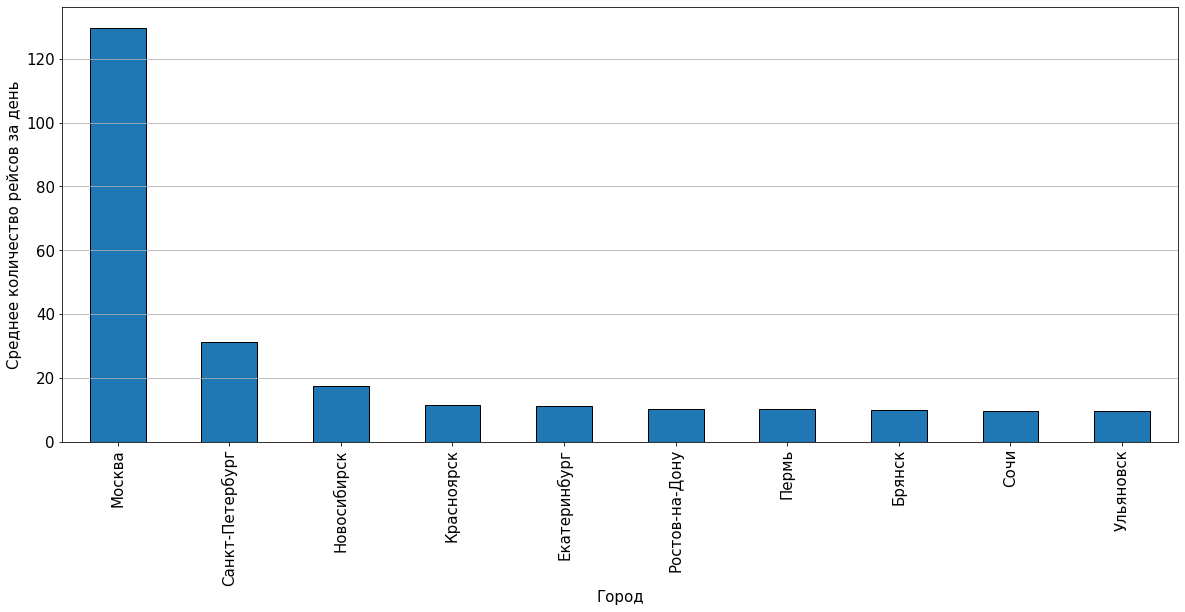

In [5]:
query_3.sort_values(by='average_flights', ascending = False).head(10).plot(x='city', 
                 y="average_flights", 
                 kind='bar', 
                 ec='black', 
                 legend=None, 
                 figsize=(20,8))
plt.xlabel('Город', size = 15)
plt.ylabel('Среднее количество рейсов за день', size = 15)
plt.grid(axis='y')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

С помощью полученного графика можем наблюдать следующее:
- **Москва лидирует по среднему количеству средних рейсов** почти в 10 раз по сравнению со всеми остальными городами в РФ, что достаточно очевидно, так как Москва является столицей и самым крупным городом РФ с четырьмя аэропортами. 
- **За Москвой с большим отставанием следует Санкт-Петербург**, также один из крупнейших городов РФ с четырьями аэропортами и возможностью перелетов в другие страны.
- На третьем месте оказался Новосибирск, так как это третий город по численности населения РФ, тоже находящийся в непосредственной близости с границами других стран.
- Остальные города, находящиеся в топ-10, являются либо также одними из самых крупных в РФ, либо являются курортными городами.

## 2.2. График количества рейсов по городам.

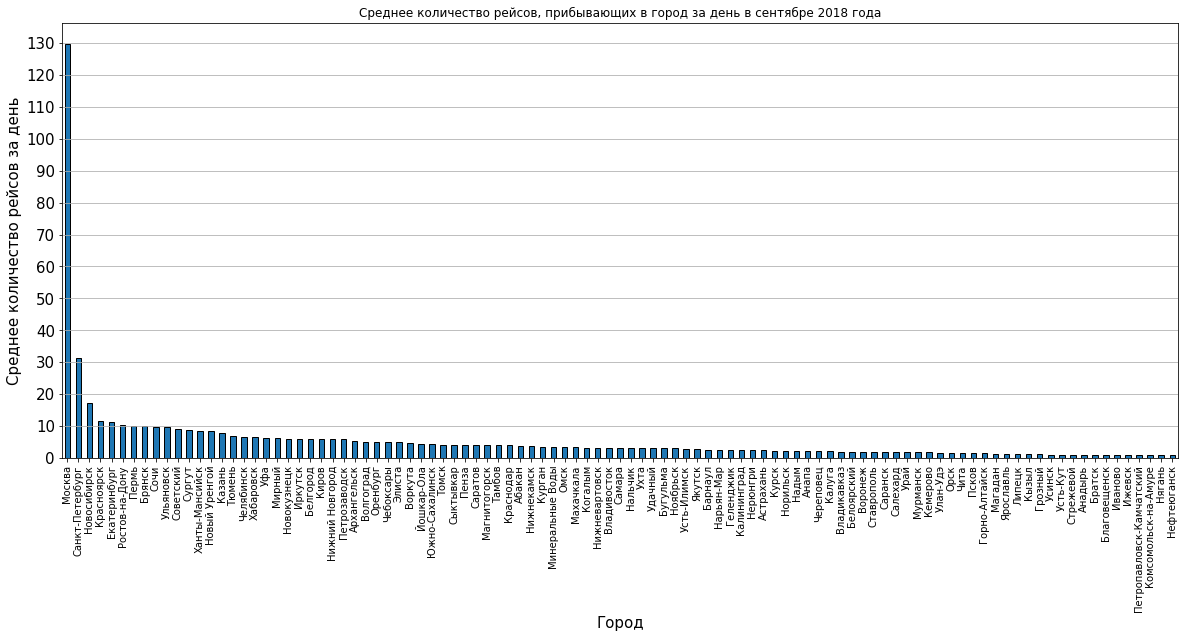

In [6]:
query_3.sort_values(by='average_flights', ascending = False).plot(x='city', 
             y="average_flights", 
             kind='bar', 
             ec='black', 
             legend=None, 
             figsize=(20,8))
plt.xlabel("Город", fontsize = 15)
plt.ylabel("Среднее количество рейсов за день", fontsize = 15)
plt.grid(axis='y')
plt.xticks(rotation=90, fontsize = 10)
plt.yticks(list(range(0, int(query_3['average_flights'].max()+10), 10)), fontsize = 15)
plt.title("Среднее количество рейсов, прибывающих в город за день в сентябре 2018 года")
plt.show()

По данному графику можем наблюдать насколько сильный отрыв в количестве рейсов между Москвой/Санкт-Петербургом/Новосибирском и остальными городами РФ. Во всех городах, не находящихся в топ-10 по количеству рейсов, в среднем за день наблюдается не более 10 рейсов в день.

## 2.3. График количества рейсов по моделям самолетов.

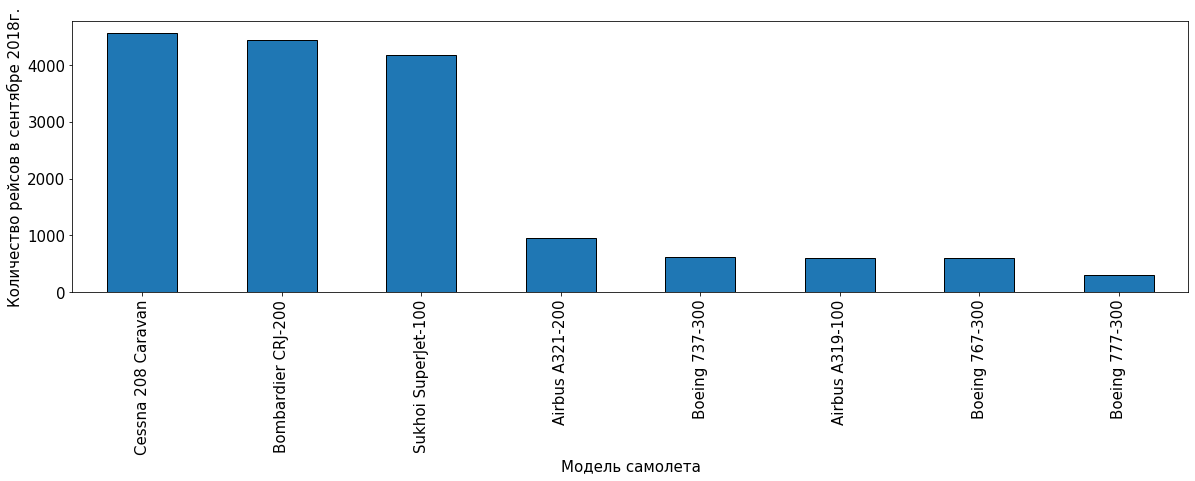

In [7]:
query_1.sort_values(by='flights_amount', ascending = False).plot(x='model', 
             y="flights_amount", 
             kind='bar', 
             ec='black', 
             legend=None, 
             figsize=(20,5))
plt.xlabel('Модель самолета', size = 15)
plt.ylabel('Количество рейсов в сентябре 2018г.', size = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Исходя из полученного графика, мы можем сделать следующие выводы:
- Наибольшее количество рейсов за месяц наблюдается у трех моделей самолетов: Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100. Такой сильный отрыв обусловлен тем что у этих трех моделей небольшая вместимость, и они предназначены для рейсов на небольшую дистанцию. 
- Соответственно, оставшиеся модели самолетов Boeing и Airbus имеют большую вместимость (> 150 чел.) и предназначены на более дальние дистанции. Малое количество рейсов у них обусловлено тем, что данные модели самолетов достаточно накладно обслуживать, и экономически не выгодно часто отправлять их в рейсы, например, на малые дистанции.

In [8]:
display(query_3.sort_values(by='average_flights', ascending = False).head(10))

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


# 3. Итоговый вывод.

Проанализировав два датасета, мы выявили следующее:
- В топ-10 городов по количеству рейсов в день находятся следующие города: Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатерингбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск. Москва лидирует по среднему количество рейсов почти в 10 раз по сравнению с остальными городами РФ. Оставшиеся города, входящие в топ-10, являются либо одними из самых крупных по населению в РФ, либо являются курортными городами. В городах, невходящих в топ-10, в среднем за день наблюдается не более 10 рейсов за день.
- По количеству рейсов за месяц лидируют три модели самолетов: Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100. Эти самолеты имеют небольшую вместимость и предназначены для рейсов на небольшую дистанцию. Модели самолетов Boeing и Airbus имеют большую вместимость (> 150 чел.) и предназначены на более дальние дистанции. Именно по этому у данных моделей самолетов наблюдается относительно мало количество рейсов по сравнению с моделями самолетов в топ-3.